In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv("C:/Users/Millpark/Downloads/SA Flights prices/flights.csv")

In [ ]:
#1st understanding the Data

In [16]:
data.head()

,id,from,to,airline,departure,arrival,price
0,1,CPT,DUR,FlySafair,1742053500,1742061000,762
1,2,CPT,DUR,LIFT Airline,1742015400,1742022900,865
2,3,CPT,DUR,LIFT Airline,1742038200,1742045700,865
3,4,CPT,DUR,FlySafair,1742057400,1742064900,762
4,5,CPT,DUR,FlySafair,1742055600,1742063100,962


In [18]:
data.tail()


,id,from,to,airline,departure,arrival,price
15388,15389,WDH,VFA,Discover Airlines,1744187400,1744193100,5366
15389,15390,WDH,VFA,Airlink,1744272900,1744278000,6648
15390,15391,WDH,VFA,Discover Airlines,1744360200,1744365900,5366
15391,15392,WDH,VFA,Airlink,1744445700,1744450800,7933
15392,15393,WDH,VFA,Discover Airlines,1744533000,1744538700,5366


In [24]:
data.shape


(15393, 7)

In [26]:
data.describe()

,id,departure,arrival,price
count,15393.000000,1.539300e+04,1.539300e+04,15393.000000
mean,7697.000000,1.743300e+09,1.743306e+09,2409.113818
std,4443.720682,7.423981e+05,7.423970e+05,1348.482379
min,1.000000,1.741992e+09,1.741996e+09,420.000000
25%,3849.000000,1.742649e+09,1.742656e+09,1462.000000
50%,7697.000000,1.743322e+09,1.743329e+09,2220.000000
75%,11545.000000,1.743940e+09,1.743946e+09,3108.000000
max,15393.000000,1.744571e+09,1.744579e+09,18444.000000


In [30]:
data.columns

Index(['id', 'from', 'to', 'airline', 'departure', 'arrival', 'price'], dtype='object')

In [32]:
data.nunique()

id           15393
from             9
to               9
airline         17
departure     4106
arrival       4342
price          707
dtype: int64

In [34]:
#2nd Cleaning the data

In [36]:
data.isnull().sum()

id           0
from         0
to           0
airline      0
departure    0
arrival      0
price        0
dtype: int64

In [143]:
flights = data.drop(["departure", "arrival", "id"], axis=1)

In [145]:
flights.head()

,from,to,airline,price
0,CPT,DUR,FlySafair,762
1,CPT,DUR,LIFT Airline,865
2,CPT,DUR,LIFT Airline,865
3,CPT,DUR,FlySafair,762
4,CPT,DUR,FlySafair,962


In [44]:
#3rd relationship analysis

In [157]:
flights.corr

<bound method DataFrame.corr of       from   to            airline  price
0      CPT  DUR          FlySafair    762
1      CPT  DUR       LIFT Airline    865
2      CPT  DUR       LIFT Airline    865
3      CPT  DUR          FlySafair    762
4      CPT  DUR          FlySafair    962
...    ...  ...                ...    ...
15388  WDH  VFA  Discover Airlines   5366
15389  WDH  VFA            Airlink   6648
15390  WDH  VFA  Discover Airlines   5366
15391  WDH  VFA            Airlink   7933
15392  WDH  VFA  Discover Airlines   5366

[15393 rows x 4 columns]>

In [286]:
# Filter flights that depart from Johannesburg
flights_from_jhb = flights[flights["from"] == "JNB"]

number_of_flights = len(flights_from_jhb)
print("Number of flights from Johannesburg:", number_of_flights)

# Count total number of unique airlines in the entire dataset
number_of_airlines = flights["airline"].nunique()
#print("Total number of airlines in dataset:", number_of_airlines)

# Count number of airlines flying from Johannesburg
number_of_airlines_from_jhb = flights_from_jhb["airline"].nunique()
print("Number of airlines flying from Johannesburg:", number_of_airlines_from_jhb)

Number of flights from Johannesburg: 6384
Number of airlines flying from Johannesburg: 9


In [284]:
flights_from_dbn = flights[flights["from"] == "CPT"]

number_of_flights = len(flights_from_cpt)

print("Number of flights from CPT:", number_of_flights)

number_of_airlines = flights["airline"].nunique()
#print("Number of airlines:", number_of_airlines)

number_of_airlines_from_capetown = flights_from_cpt["airline"].nunique()
print("Number of airlines flying from Cape Town:", number_of_airlines_from_capetown)

Number of flights from CPT: 3611
Number of airlines flying from Cape Town: 8


In [289]:
flights_from_dbn = flights[flights["from"] == "CPT"]

number_of_flights = len(flights_from_cpt)

print("Number of flights from CPT:", number_of_flights)

number_of_airlines = flights["airline"].nunique()
#print("Number of airlines:", number_of_airlines)

number_of_airlines_from_capetown = flights_from_cpt["airline"].nunique()
print("Number of airlines flying from Cape Town:", number_of_airlines_from_capetown)

Number of flights from CPT: 3611
Number of airlines flying from Cape Town: 8


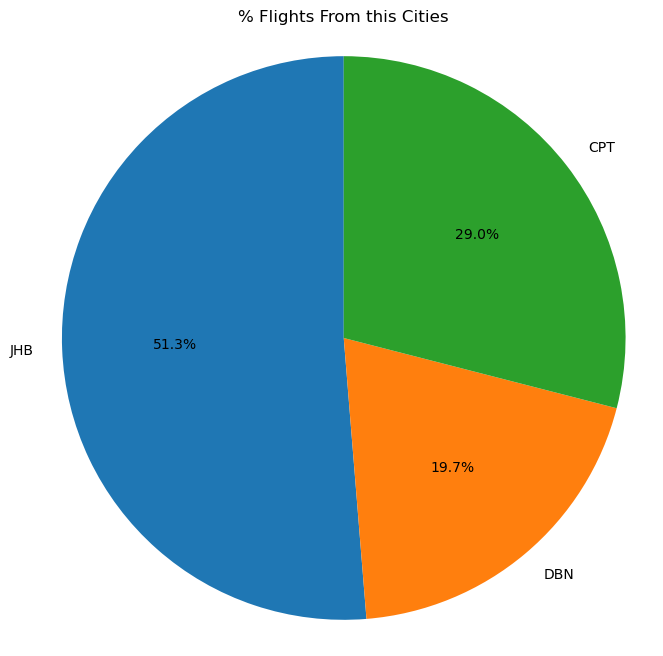

In [331]:
Cities_Flights = pd.DataFrame({
    "cities": ["JHB", "DBN", "CPT"],
    "Number of Flights": [len(flights[flights["from"] == "JNB"]),
                          len(flights[flights["from"] == "DUR"]),
                          len(flights[flights["from"] == "CPT"])]
})

plt.figure(figsize=(8, 8))  # Optional: adjust figure size for a better look
plt.pie(x=Cities_Flights["Number of Flights"], 
        labels=Cities_Flights["cities"], 
        autopct='%1.1f%%', 
        startangle=90)

# Add a title and ensure the aspect ratio is equal (makes it a circle)
plt.title('% Flights From this Cities')
plt.axis('equal')  # Ensures the pie chart is a perfect circle

# Display the plot
plt.show()

Busiest Airline: FlySafair with 5733 flights
Least Busy Airline: Discover Airlines with 7 flights


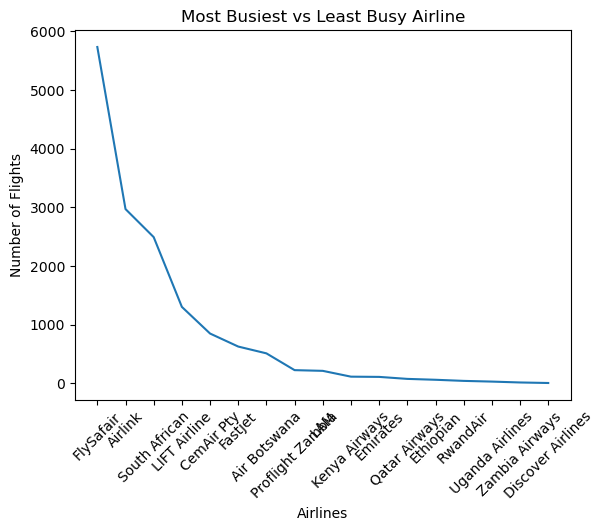

In [361]:
import matplotlib.pyplot as plt

# Count the number of flights per airline
airline_counts = flights['airline'].value_counts()

# Find the busiest and least busy airlines
busiest_airline = airline_counts.idxmax()
least_busy_airline = airline_counts.idxmin()

# Get the flight counts
busiest_count = airline_counts.max()
least_busy_count = airline_counts.min()

# Print the results
print(f"Busiest Airline: {busiest_airline} with {busiest_count} flights")
print(f"Least Busy Airline: {least_busy_airline} with {least_busy_count} flights")

# Prepare data for the scatter plot
value_x = airline_counts.index  # Correctly use the airline names from the index
value_y = airline_counts.values  # Use the counts of flights as y-values

# Changed from plt.linebar to plt.bar to create a bar chart
plt.plot(value_x, value_y)
plt.xlabel('Airlines')
plt.ylabel('Number of Flights')
plt.title('Most Busiest vs Least Busy Airline')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

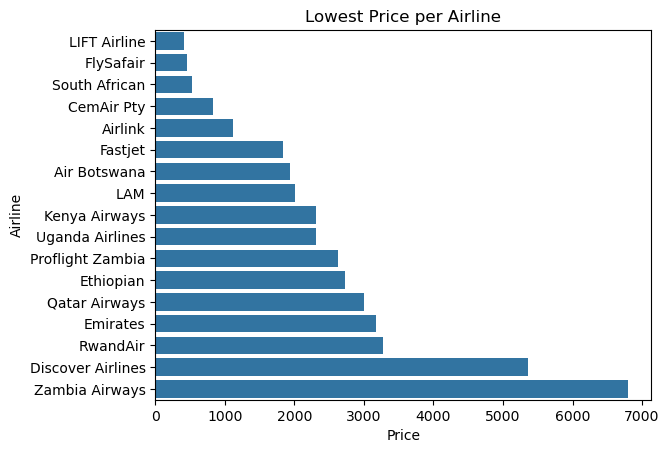

In [247]:
lowest_prices_by_airline = flights.groupby("airline")["price"].min().sort_values()
lowest_prices_by_airline = lowest_prices_by_airline.reset_index()


sns.barplot(x="price", y="airline", data=lowest_prices_by_airline)

plt.title("Lowest Price per Airline")
plt.xlabel("Price")
plt.ylabel("Airline")
plt.show()